# **HEART DISEASE PREDICTION**
### **Logistic regression**

---




* [Problem Introduction & Motivation](https://github.com/AbelEsther/HEART-DISEASE-PREDICTION?tab=readme-ov-file#problem-introduction--motivation)
* [Dataset Description](https://github.com/AbelEsther/HEART-DISEASE-PREDICTION?tab=readme-ov-file#dataset-description)
* [Model Evaluation Summary](https://github.com/AbelEsther/HEART-DISEASE-PREDICTION?tab=readme-ov-file#model-evaluation-summary)
* [Analysis Summary](https://github.com/AbelEsther/HEART-DISEASE-PREDICTION?tab=readme-ov-file#analysis-summary)




### Reading CSV File

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import csv file from drive
path="/content/drive/MyDrive/Colab Notebooks/heart_disease.csv"

Mounted at /content/drive


In [ ]:
# Load the uploaded CSV file into a DataFrame
df=pd.read_csv(path)

### Initial Inspection

In [ ]:
# Display the total number of columns, names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   heart_disease     297 non-null    int64  
 1   age               268 non-null    float64
 2   sex               297 non-null    object 
 3   max_heart_rate    297 non-null    int64  
 4   angina_level      277 non-null    object 
 5   non_anginal_pain  297 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 14.0+ KB


In [ ]:
# Separate numerical and categorical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical variables:", numerical_vars)
print("Categorical variables:", categorical_vars)


Numerical variables: ['heart_disease', 'age', 'max_heart_rate', 'non_anginal_pain']
Categorical variables: ['sex', 'angina_level']


In [ ]:
# Show the first and last few observations
# Display the first few rows of the data to understand its structure
print("\nFirst few rows of the dataset:")
print(df.head())

# Display the last few rows of the data to see the end of the dataset
print("\nLast few rows of the dataset:")
print(df.tail())


First few rows of the dataset:
   heart_disease   age     sex  max_heart_rate angina_level  non_anginal_pain
0              0  69.0    male             131           No                 0
1              0  69.0  female             151           No                 0
2              0   NaN  female             114           No                 0
3              1  65.0    male             174           No                 0
4              0  64.0    male             144         Mild                 0

Last few rows of the dataset:
     heart_disease   age     sex  max_heart_rate angina_level  \
292              1  40.0    male             181           No   
293              1  39.0    male             140           No   
294              1  35.0    male             130         Mild   
295              0  35.0  female             182           No   
296              1   NaN    male             156         Mild   

     non_anginal_pain  
292                 0  
293                 0  
294   

In [ ]:
df.describe()

,heart_disease,age,max_heart_rate,non_anginal_pain
count,297.000000,268.000000,297.000000,297.000000
mean,0.461279,54.250000,146.380471,0.279461
std,0.499340,9.039292,38.500000,0.449492
min,0.000000,29.000000,-170.000000,0.000000
25%,0.000000,47.750000,132.000000,0.000000
50%,0.000000,55.000000,152.000000,0.000000
75%,1.000000,60.000000,165.000000,1.000000
max,1.000000,77.000000,202.000000,1.000000


## Data Cleaning

### a. Checking for missing values




In [ ]:
# Check for missing values
df.isnull().sum()

,0
heart_disease,0
age,29
sex,0
max_heart_rate,0
angina_level,20
non_anginal_pain,0


In [ ]:
# Calculate the percentage of missing values in angina_level and age
missing_percentage = df['angina_level'].isnull().sum() / len(df) * 100
missing_age_percentage = df['age'].isnull().sum() / len(df) * 100

# Display the result
print(f"Missing values in 'angina_level': {missing_percentage:.2f}%")
print(f"Missing values in 'age': {missing_age_percentage:.2f}%")

Missing values in 'angina_level': 6.73%
Missing values in 'age': 9.76%


#### Handle Coding Issue
Checking whether to drop missing values or replace with mean and median

In [ ]:
# Create a copy of the original dataset to handle Age's coding issue
df_copy = df.copy()

In [ ]:
# Replace empty age values with NaN
df_copy['age'] = df_copy['age'].fillna(pd.NA)
df_copy['angina_level'] = df_copy['angina_level'].fillna(pd.NA)

print(df_copy.head(10))

   heart_disease   age     sex  max_heart_rate angina_level  non_anginal_pain
0              0  69.0    male             131           No                 0
1              0  69.0  female             151           No                 0
2              0   NaN  female             114           No                 0
3              1  65.0    male             174           No                 0
4              0  64.0    male             144         Mild                 0
5              0  64.0    male             155           No                 0
6              0   NaN    male             150           No                 0
7              1  61.0    male            -145           No                 0
8              0  60.0  female             171           No                 0
9              0  59.0    male             145           No                 0


#### Option 1: replace missing values with mean (or mode)

In [ ]:
# Create a copy of the dataset to avoid changing the original data
df_copy1 = df_copy.copy()

# Option 1: Replace missing values in 'Age'
mean_age = df_copy1['age'].mean()  # Calculate mean for Age (excluding NaN)

# Fill missing Age with respective mean
df_copy1['age'].fillna(mean_age, inplace=True)

# Fill missing values in angina_level with the mode
mode_angina_level= df_copy1['angina_level'].fillna(df['angina_level'].mode()[0], inplace=True)

<ipython-input-12-3c3a2f425c80>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy1['age'].fillna(mean_age, inplace=True)
<ipython-input-12-3c3a2f425c80>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

#### Option 2: Drop missing values

In [ ]:
# Create a copy of the dataset to avoid changing the original data
df_copy2 = df_copy.copy()

# Option 2: Drop rows where either 'Age' or 'Angina_level' has missing values
df_dropped = df_copy2.dropna(subset=['age', 'angina_level'])

#### Compare the differences

In [ ]:
# Function to display statistics for Age and Income
def display_statistics(df, dataset_name):
    # Count how many rows have Age missing
    age_coding_issue_count = df['age'].isnull().sum()


    print(f"\nStatistics for {dataset_name}:")
    print(f"Number of observations: {len(df)}")
    print(f"Mean Age: {df['age'].mean():.2f}")
    print(f"Number of rows with missing age: {age_coding_issue_count}")
    print(f"Missing angina_level: {df['angina_level'].isnull().sum()}")

# Compare the original dataset
display_statistics(df, "Original Dataset (with missing values)")

# Compare the dataset where missing values were replaced with the mean
display_statistics(df_copy1, "Dataset with Mean Imputation")

# Compare the dataset where rows with missing values were dropped
display_statistics(df_dropped, "Dataset with Dropped Missing Values")


Statistics for Original Dataset (with missing values):
Number of observations: 297
Mean Age: 54.25
Number of rows with missing age: 29
Missing angina_level: 20

Statistics for Dataset with Mean Imputation:
Number of observations: 297
Mean Age: 54.25
Number of rows with missing age: 0
Missing angina_level: 0

Statistics for Dataset with Dropped Missing Values:
Number of observations: 250
Mean Age: 54.39
Number of rows with missing age: 0
Missing angina_level: 0


#### **Choosing the best method**
Given that the analysis is for predicting heart disease in medical patients—a high-stakes application where accuracy is essential—here’s how each method aligns with the goal:

### **a. Mean Imputation**
   - **Pros**: Retains all 297 patient records, which may improve the model’s statistical power and generalizability. Since `Mean Age` remains unchanged, it minimally impacts the age distribution and ensures the dataset's overall integrity.
   - **Cons**: Imputing missing values with the mean may obscure individual variation, which could be significant in a medical context, especially if age or angina level patterns are influential in predicting heart disease.

### **b. Dropping Missing Values**
   - **Pros**: Ensures a clean dataset with no imputation bias. By retaining 250 out of 297 records, you still have a substantial sample size that likely remains representative. With no missing data, model training is simplified, potentially improving interpretability and reducing the risk of bias in predictions.
   - **Cons**: Reduces the dataset by 16%, which may slightly affect the statistical power and potentially omit valuable patient data if those missing values were from cases with distinct characteristics.

### **Recommendation**
For a **medical prediction model**, accuracy, reliability, and minimal bias are paramount. Therefore, **dropping rows with missing values** is generally the better option here, given the dataset size (250 remaining records), which is adequate for a classification task. This approach avoids any potential imputation bias and preserves the natural variability, which could be critical in a model intended to make medical predictions.

### b. Handling missing values
Dropping missing values

In [ ]:
# Drop rows where either 'Age' or 'Angina_level' has missing values
df = df.dropna(subset=['age', 'angina_level'])

# Display the number of remaining rows
print(f"Number of observations after dropping missing values in Age and angina_level: {df.shape[0]}")

Number of observations after dropping missing values in Age and angina_level: 250


### c. Checking for unusual values

In [ ]:
# Convert negative values in 'max_heart_rate' to positive values
df['max_heart_rate'] = df['max_heart_rate'].abs()

## Transforming
Encode categorical variable (transform to numerical variable)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for Sex (binary nominal variable)
label_encoder = LabelEncoder()
df['sex_LabelEncoded'] = label_encoder.fit_transform(df['sex'])

print(df[['sex', 'sex_LabelEncoded']].head())

      sex  sex_LabelEncoded
0    male                 1
1  female                 0
3    male                 1
4    male                 1
5    male                 1


In [ ]:
print(df['angina_level'].unique())


['No' 'Mild' 'Severe']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding for angina_level (assuming natural order: No < Mild < Several)
angina_level_order = [['No', 'Mild', 'Severe']]
ordinal_encoder = OrdinalEncoder(categories=angina_level_order)
df['angina_level_OrdinalEncoded'] = ordinal_encoder.fit_transform(df[['angina_level']])

print(df[['angina_level', 'angina_level_OrdinalEncoded']].head(20))

   angina_level  angina_level_OrdinalEncoded
0            No                          0.0
1            No                          0.0
3            No                          0.0
4          Mild                          1.0
5            No                          0.0
7            No                          0.0
8            No                          0.0
9            No                          0.0
11           No                          0.0
12           No                          0.0
13           No                          0.0
14           No                          0.0
15           No                          0.0
16           No                          0.0
17         Mild                          1.0
18           No                          0.0
20       Severe                          2.0
21       Severe                          2.0
22           No                          0.0
23         Mild                          1.0


## Summarizing and Visualization

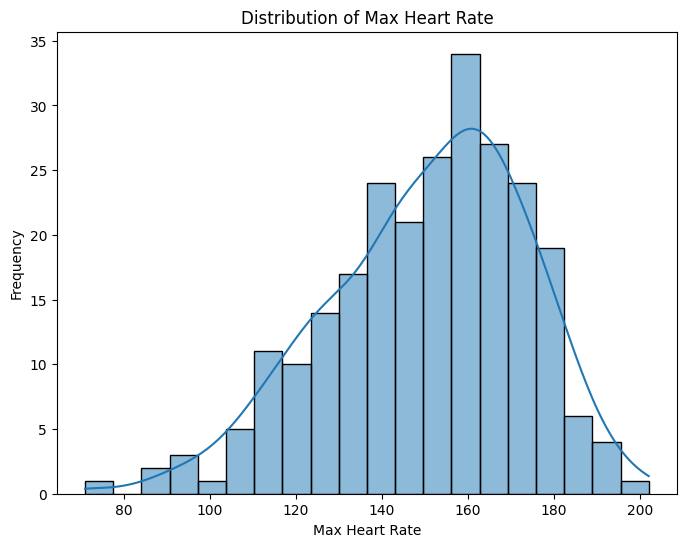

In [ ]:
# Histogram for a continuous variable
plt.figure(figsize=(8, 6))
sns.histplot(df['max_heart_rate'], kde=True, bins=20)
plt.title('Distribution of Max Heart Rate')
plt.xlabel('Max Heart Rate')
plt.ylabel('Frequency')
plt.show()

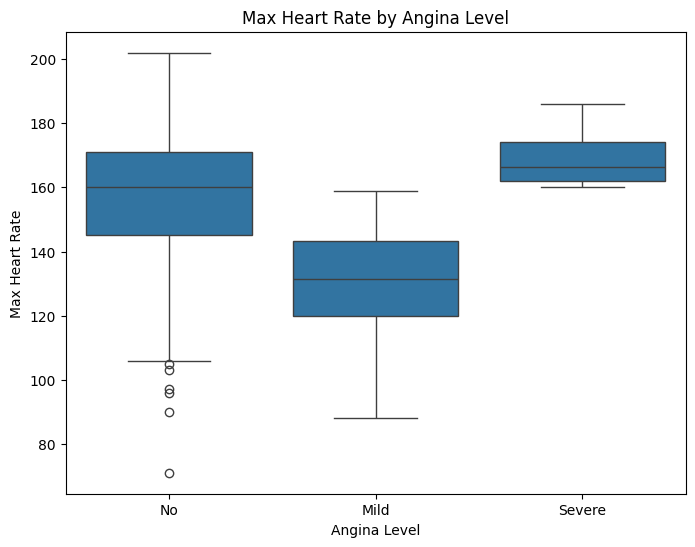

In [ ]:
#Compare the distribution of age or max_heart_rate across different angina_level categories.
# Boxplot for 'max_heart_rate' grouped by 'angina_level'
plt.figure(figsize=(8, 6))
# Pass the DataFrame using the 'data' argument, and specify 'x' and 'y' as column names
sns.boxplot(x='angina_level', y='max_heart_rate', data=df)  # Correctly passing the DataFrame
plt.title('Max Heart Rate by Angina Level')
plt.xlabel('Angina Level')
plt.ylabel('Max Heart Rate')
plt.show()


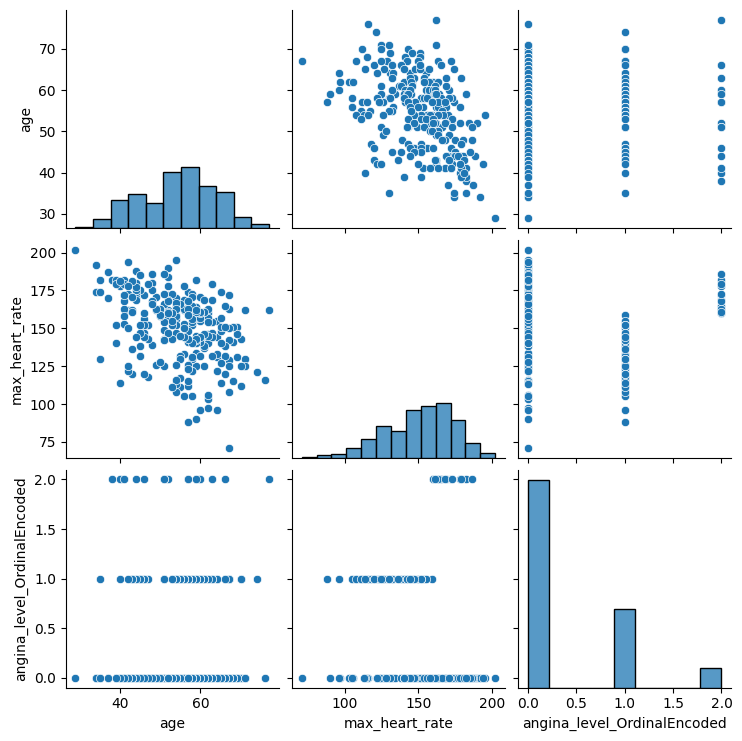

In [ ]:
# Pair plot for multiple continuous variables
sns.pairplot(df[['age', 'max_heart_rate', 'angina_level_OrdinalEncoded']])  # include any relevant columns
plt.show()


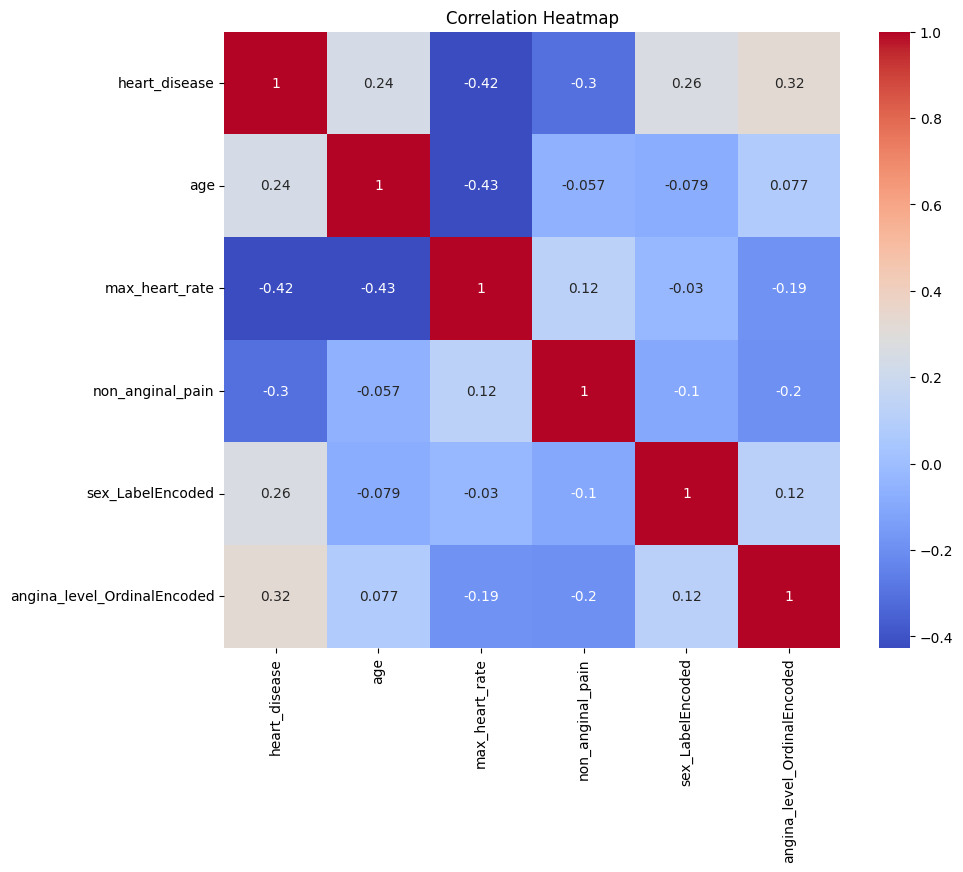

In [ ]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))

# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])  # Select numerical columns only

sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


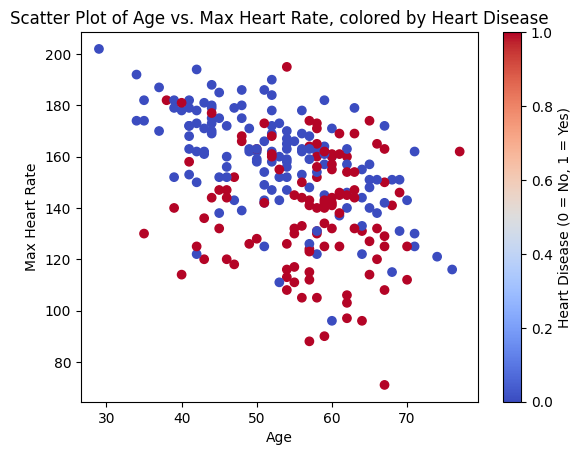

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['age'], df['max_heart_rate'], c=df['heart_disease'], cmap='coolwarm')
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Scatter Plot of Age vs. Max Heart Rate, colored by Heart Disease")
plt.colorbar(label='Heart Disease (0 = No, 1 = Yes)')
plt.show()

In [ ]:
# Display the summary statistics for the entire table
print(df.describe())

       heart_disease         age  max_heart_rate  non_anginal_pain  \
count     250.000000  250.000000      250.000000        250.000000   
mean        0.456000   54.388000      150.420000          0.260000   
std         0.499059    9.153612       22.970113          0.439514   
min         0.000000   29.000000       71.000000          0.000000   
25%         0.000000   47.250000      134.500000          0.000000   
50%         0.000000   55.500000      153.500000          0.000000   
75%         1.000000   61.000000      167.750000          1.000000   
max         1.000000   77.000000      202.000000          1.000000   

       sex_LabelEncoded  angina_level_OrdinalEncoded  
count        250.000000                   250.000000  
mean           0.664000                     0.384000  
std            0.473286                     0.604986  
min            0.000000                     0.000000  
25%            0.000000                     0.000000  
50%            1.000000                

# Model Selection

**Model to be used: Logistics Regression**

Simple linear regression is typically not suitable for predicting a binary outcome, like the presence of heart disease, because it assumes a continuous relationship between the input features and the target variable. Linear regression can predict values outside the 0-1 range, making it unreliable for classification tasks where the target variable is categorical (0 for no disease, 1 for disease).
<br><br>**Logistic regression**, however, is designed for binary outcomes. It uses the sigmoid function to produce probabilities between 0 and 1, which can then be thresholded to make class predictions. This makes logistic regression a better choice for a dataset like this, where I am predicting a categorical outcome based on patient characteristics.

## Create Training and Testing Sets and Run the Models

The Train/Test Split technique involves dividing the dataset into two distinct subsets: one for training and one for testing. The model is trained using the training set and evaluated using the testing set.

By splitting the data into training and testing sets, the model can be trained on one portion of the data and evaluated on another, helping to ensure that the model generalizes well to new data rather than just memorizing the training data. The use of random_state adds an element of consistency to the process, so that the same split is generated each time, which is particularly helpful in research or when sharing code. This approach is standard practice in machine learning workflows to prevent overfitting and provide a reliable estimate of model performance.

* The code snippet uses the train_test_split function from the sklearn.model_selection module to divide a dataset into two subsets: one for training and one for testing a machine learning model.

* The dataset, df, is split with 70% of the data assigned to the training set (train) and 30% assigned to the testing set (test). The test_size=0.3 parameter controls this division by specifying that 30% of the data should be reserved for testing.

* The random_state=42 ensures that the split is consistent each time the code is run, which is useful for reproducibility. The training set is used to train the model, while the test set is used to evaluate how well the model performs on unseen data.

## Using Logistic regression

                Metric     Score  Predicted_No  Predicted_Yes  precision  \
0             Accuracy  0.746667           NaN            NaN        NaN   
1              ROC-AUC  0.738095           NaN            NaN        NaN   
Actual_No          NaN       NaN          34.0            8.0        NaN   
Actual_Yes         NaN       NaN          11.0           22.0        NaN   
0                  NaN       NaN           NaN            NaN   0.755556   
1                  NaN       NaN           NaN            NaN   0.733333   
accuracy           NaN       NaN           NaN            NaN   0.746667   
macro avg          NaN       NaN           NaN            NaN   0.744444   
weighted avg       NaN       NaN           NaN            NaN   0.745778   
Coefficients       NaN       NaN           NaN            NaN        NaN   

                recall  f1-score    support       age  sex_LabelEncoded  \
0                  NaN       NaN        NaN       NaN               NaN   
1            

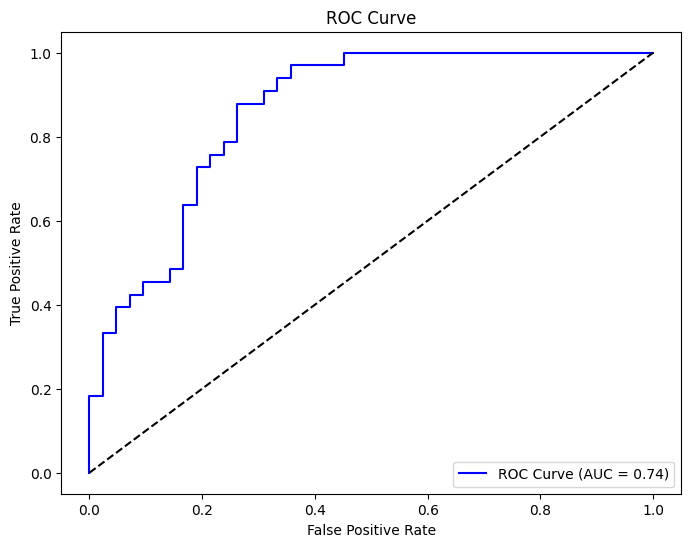

ROC-AUC Score: 0.74


In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt

# Define features and target
X = df[['age', 'sex_LabelEncoded', 'max_heart_rate', 'angina_level_OrdinalEncoded', 'non_anginal_pain']]  # 5 patient characteristics
y = df['heart_disease']  # Target column: 1 for disease, 0 for no disease

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Create conf_matrix_df
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Actual_No', 'Actual_Yes'],
                              columns=['Predicted_No', 'Predicted_Yes'])

# Create report_df
report_df = pd.DataFrame(report).transpose()

# Create coefficients DataFrame
coefficients = pd.DataFrame(logreg.coef_, columns=X.columns, index=['Coefficients'])

# Add ROC-AUC to the results DataFrame
df_results = pd.concat([
    pd.DataFrame({'Metric': ['Accuracy', 'ROC-AUC'], 'Score': [accuracy, roc_auc]}), # Add ROC-AUC
    conf_matrix_df,
    report_df,
    coefficients
])

# Display all combined results
print(df_results)

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--")  # Diagonal line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"ROC-AUC Score: {roc_auc:.2f}")

## Calculate and plot the ROC curve along with the AUC score
ROC-AUC provides a valuable measure of how well the model discriminates between the positive (heart disease) and negative (no heart disease) classes across all possible thresholds. It’s particularly useful for imbalanced datasets or when evaluating a model’s overall diagnostic ability. A higher AUC score (close to 1) indicates better discrimination between classes.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix  # Make sure it's imported
CM = metrics.confusion_matrix(y_test, y_pred) # Call confusion_matrix function
CM_df = pd.DataFrame(CM, index=['Actual_No', 'Actual_Yes'], columns=['Predicted_No', 'Predicted_Yes'])

print(CM_df)

            Predicted_No  Predicted_Yes
Actual_No             34              8
Actual_Yes            11             22
